# Interpreting discrete time simulation parameter values

Consider the basic ODE model for number of transcripts $T$ at time $t$

$$\frac{dT}{dt} = k_\text{init} - k_\text{decay} T$$

where $T(0) = T_0$ and the steady-state is $T^* = \frac{k_\text{init}}{k_\text{decay}}$. The solution is

$$\begin{aligned}
T(t)
&= \frac{k_\text{init}}{k_\text{decay}} - \frac{k_\text{init}}{k_\text{decay}} e^{-k_\text{decay} t} + T_0 e^{-k_\text{decay} t} \\
&= \frac{k_\text{init}}{k_\text{decay}} \left(1 - e^{-k_\text{decay} t}\right) + T_0 e^{-k_\text{decay} t} \\
&= \frac{k_\text{init}}{k_\text{decay}} + \left(T_0 - \frac{k_\text{init}}{k_\text{decay}} \right) e^{-k_\text{decay} t}
\end{aligned}$$

Observe that the parameters have the following units:
- $[k_\text{init}] = \text{transcripts} \cdot \text{time}^{-1}$
- $[k_\text{decay}] = \text{time}^{-1}$

<!-- The discrete time simulation parameters are $k_\text{init}$, $k_\text{decay}$, $k_\text{splice}$, and $k_\text{elong}$. -->

In the discrete-time simulation, initiation and decay are both modeled probabilistically. How does one convert rates to probabilities, and vice versa?

In each time step $\tau$, $T_\text{new}$ transcripts are generated according to some distribution $\mathcal{D}(T_\text{new})$. What is the relationship between $\mathcal{D}(T_\text{new})$ and $k_\text{init}$?
- Answer: $\fbox{\(\mathcal{D}(T_\text{new}) = \text{Poisson}(k_\text{init})\)}$
- The Poisson model for transcription initiation is straightforward: over the time step of 1 unit of time (e.g., 1 second), there may have been a large number $n$ of independent transcription intiation attempts by polymerase molecules, but only some small probability $p_\text{init}$ of them are successful. This is described by a Binomial model. In the limit of large $n$ and small $p_\text{init}$ such that $np_\text{init} = k_\text{init}$, the Poisson model (with mean $k_\text{init}$) is appropriate.

In each time step $\tau$, each transcript decays with probability $p_\text{decay}$. What is the relationship between $p_\text{decay}$ and $k_\text{decay}$?
- Answer: $\fbox{\(p_\text{decay} = 1 - \exp(-k_\text{decay})\)}$. The inverse is $k_\text{decay} = -\log(1 - p_\text{decay})$
- Since we only care about decay of *existing* transcripts, we can ignore transcript initiation. In other words, the relationship between $p_\text{decay}$ and $k_\text{decay}$ can be determined by examining the simplified model
  $$\frac{dT}{dt} = -k_\text{decay}T \quad \rightarrow \quad T(t) = T_0 e^{-k_\text{decay} t}$$
  The probability of decay between any two consecutive time steps $T(t)$ and $T(t + \tau)$ is
  $$1 - \frac{T(t + \tau)}{T(t)} = 1 - \frac{T_0 e^{-k_\text{decay} (t + \tau)}}{T_0 e^{-k_\text{decay} t}} = 1 - e^{-k_\text{decay} \tau}$$

  If $\tau$ is exactly 1 unit of time (the same units for $k_\text{decay}$; for example, if $\tau = 1 \text{ second(s)}$ and $k_\text{decay}$ has units $\text{second(s)}^{-1}$, then we can just work with the value of $k_\text{decay}$, so $p_\text{decay} = 1 - \exp(-k_\text{decay})$.

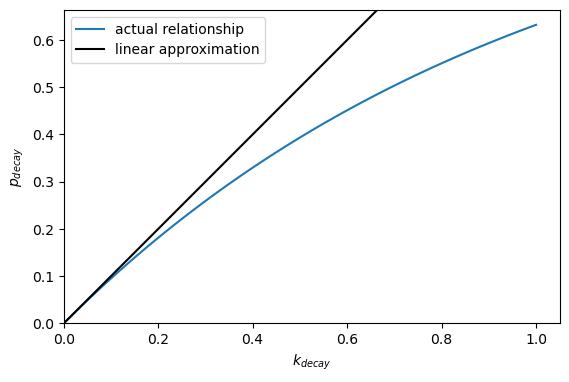

In [1]:
import numpy as np
import matplotlib.pyplot as plt
k_decay = np.linspace(0, 1, 100)
p_decay = 1 - np.exp(-k_decay)
fig, ax = plt.subplots()
ax.plot(k_decay, p_decay, label='actual relationship')
ax.axline((0, 0), slope=1, c='k', label='linear approximation')
ax.set_aspect('equal')
ax.set(xlim=(0, None), ylim=(0, None), xlabel='$k_{decay}$', ylabel='$p_{decay}$')
ax.legend()
fig.show()